# Gradient descent

In this exercice we will make a linear fit to simulated data using the (stochastic) gradient descent method.

In [2]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy import optimize # for fits
%matplotlib inline

## 1. Generate training dataset

a) First Generate N=100 observations of 1-D feature x and target values t, where:
* x is evenly spaced between 0 and 1 (use `np.linspace` function)
* t follows a linear function $f(x)$ plus some random gaussian noise $\epsilon$: $$t_i = f(x_i) + \epsilon = a \cdot x_i + b + \epsilon,$$ with a=2 and b=5, and $\epsilon$ is distributed along the normal distribution `np.random.normal(0,0.1,N)`

b) On a figure plot the values of the N data points $\{x_i,t_i\}$ and draw, on the same figure, the function $f(x)$.


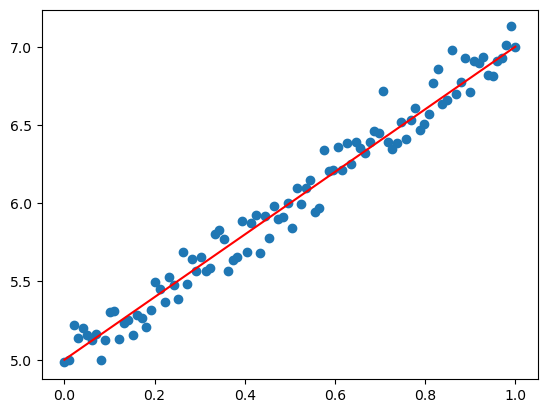

In [7]:
N = 100
x = np.linspace(0,1,N)
def f(x,a=2,b=5,N=100):
    return a*x+b+np.random.normal(0,0.1,N)
plt.scatter(x,f(x))
plt.plot(x, 2*x+5,c='r');

## 2. Cost function and gradients

To determine the weights $a$ and $b$ of $f(x)$ we'll use the Mean Square Error cost function:
$$E(a,b) = \frac{1}{N} \sum_{i=1}^N \left(t_i - y(x_i) \right) ^2.$$

The derivatives of the cost function with respect to the parameters $a$ and $b$ are: 

\begin{eqnarray}
\begin{cases}
\frac{\partial E(a,b)}{\partial a} = -2 \frac{1}{N} \sum_{i=1}^N x_i \left(t_i - y(x_i) \right) \\\\
\frac{\partial E(a,b)}{\partial b} = -2 \frac{1}{N} \sum_{i=1}^N \left(t_i - y(x_i) \right) 
\end{cases}
\end{eqnarray}

a) Write a function `E(a,b,x,t)` that return the MSE cost function:
```python
def E(a,b,x,t):
    ...
    return E
```

b) Write a function `update_weights` that calculate the partial derivatives of the cost function, and that updates the weights $a$ and $b$ for a given `learning_rate`:
```python
def update_weights(a, b, x, t, learning_rate):
    a_deriv = 0
    b_deriv = 0
    # Calculate partial derivatives
        ...
    # Update weights
    a -= ...
    b -= ...
    return a, b
```

In [12]:
def E(x,t,N=100,a=2,b=5):
    return 1/N * np.sum((t-f(x,a,b,N))**2)
t=2*x+5
print('MSE:', E(x,t))

MSE: 0.010085836269099698


In [25]:
def update_weights(x, t, learning_rate, a, b, N=100):
    a_derive = 0
    b_derive = 0
    dEda = -2* np.mean(x*(t-f(x,a,b,N)))
    dEdb = -2* np.mean(t-f(x,a,b,N))
    a -= dEda*learning_rate
    b -= dEdb*learning_rate
    return [a,b]
update_weights(x,t,1,a=0,b=0)

[6.331629810820209, 12.030767670214495]

## 3. Performing training

a) Starting from initial values $a=1$, $b=1$, apply the gradient descent method `nsteps=1000` times, with `learning_rate=0.05`. Calculate the cost function at each step. What are the values of $a$ and $b$ at the last step ?

b) Make a figure of the cost function as a function of number of steps.

c) Show on a 2-D figure how the value of the parameters $a$ and $b$ change at each step.

In [27]:
nsteps=1000
Err=[]
a_derive = [1]
b_derive = [1]
for i in range (0,nsteps):
    a_derive.append( update_weights(x,t,learning_rate=0.05,a=a_derive[-1],b=b_derive[-1])[0])
    b_derive.append( update_weights(x,t,learning_rate=0.05,a=a_derive[-1],b=b_derive[-1])[1])
    Err.append(E(x,t,N=100,a=a_derive[-1],b=b_derive[-1]))

[15.669536308066144,
 11.984564215828232,
 9.27423420682117,
 7.0458942237220015,
 5.4267719114984825,
 4.177358378115704,
 3.2188562806793035,
 2.4922881809067623,
 1.9487177686426247,
 1.5168095914539774,
 1.1459015707191051,
 0.9153231192618193,
 0.7332708565201931,
 0.5690235888009341,
 0.4501432118958649,
 0.34083795774659864,
 0.2859737367332632,
 0.2327351046872265,
 0.18886864673643852,
 0.16389178678891367,
 0.1443724071053996,
 0.12114727836452385,
 0.10789822242312681,
 0.10527331098199603,
 0.08646555793403483,
 0.08897713845378374,
 0.07713849805596387,
 0.07144339941816825,
 0.06625205182402455,
 0.06663242502124322,
 0.06694575421826014,
 0.06209885749948939,
 0.055382594895965996,
 0.061676610101487284,
 0.05604436794946931,
 0.05951220791975045,
 0.05386879598452288,
 0.06130332306350504,
 0.05450862390687084,
 0.05462939825634659,
 0.053777195130799677,
 0.046835298213165066,
 0.04459802447413002,
 0.04310757385943235,
 0.05095680351228722,
 0.046711462412466646,
 0.0

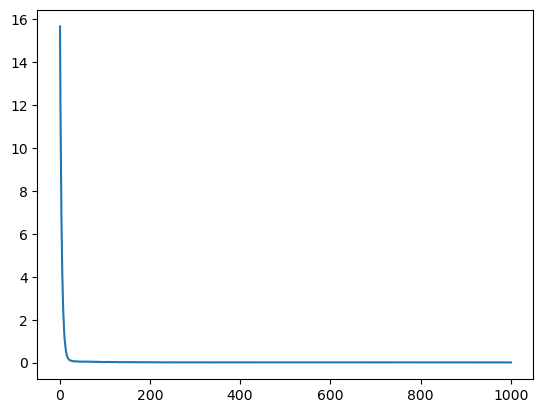

In [30]:
plt.plot(np.linspace(1,1000,1000),Err);

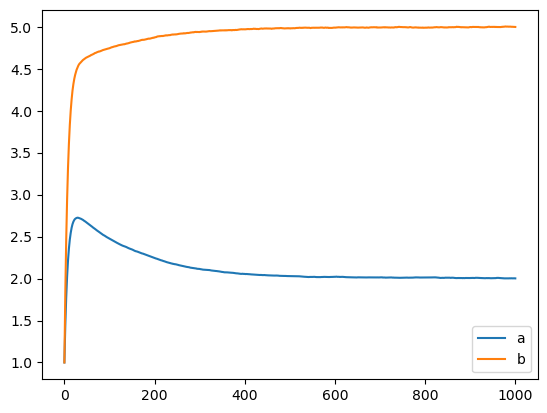

In [34]:
plt.plot(np.linspace(0,1000,1001),a_derive,label='a')
plt.plot(np.linspace(0,1000,1001),b_derive, label='b')
plt.legend();

## 4. Stochastic gradient descent

a) Perform gradient descent on batch of 10 events instead of total number of events $N$. This is called ${\it stochastic}$ gradient descent.

b) Redo the same figures as in question 3.

c) Play with batch size and learning rate

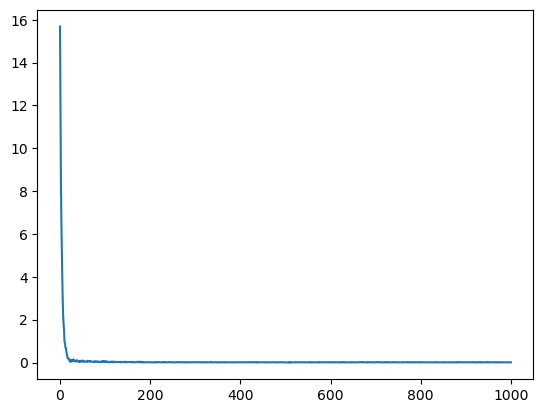

In [44]:
# Parameters
nsteps=1000
a_grad=1 # initial value for a
b_grad=1 # initial value for b
learning_rate = 0.05
batch_size=10 # batch size

# First pair x,t values
x1 = x[:,np.newaxis] # Transform vector into column of dim (100,1)
t1 = t[:,np.newaxis] # Transform vector into column of dim (100,1)
points = np.concatenate((x1,t1),axis=1) # Concatenate two vectors in table of dim (100,2)

# Training
a_derive=[1]
b_derive=[1]
Err=[]
for i in range(nsteps):
    np.random.shuffle(points)   # Shuffle values
    XX = points[:batch_size,0]  # x feature
    YY = points[:batch_size,1]  # target value
    a_derive.append(update_weights(XX,YY,learning_rate=0.05,a=a_derive[-1],b=b_derive[-1],N=batch_size)[0])
    b_derive.append(update_weights(XX,YY,learning_rate=0.05,a=a_derive[-1],b=b_derive[-1],N=batch_size)[1])
    Err.append(E(XX,YY,N=batch_size,a=a_derive[-1],b=b_derive[-1]))
# CONTINUE HERE
plt.plot(np.linspace(0,1000,1000),Err)

### Optional: Fit data with a polynomial function

Use `np.polyfit` function. Check that the fitted parameters are compatible with the true parameters $a$ and $b$.

In [45]:
np.polyfit(x,t,deg=1)

array([2., 5.])